In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [2]:
df=pd.read_csv("C:\\Titanic_train.csv")
ds=pd.read_csv("C:\\Titanic_test.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
ds.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
ds.shape

(418, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

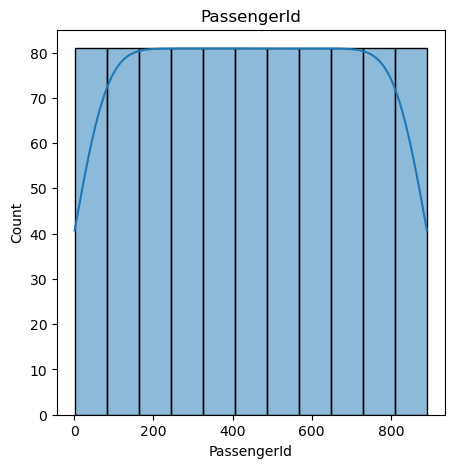

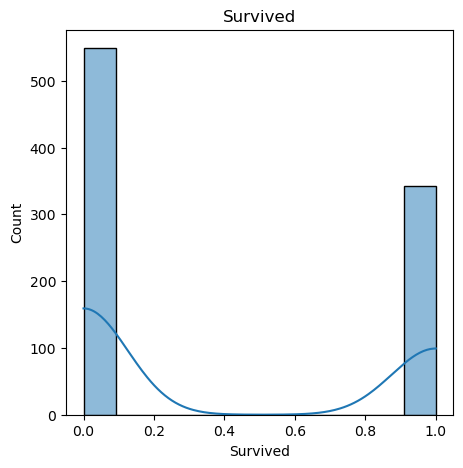

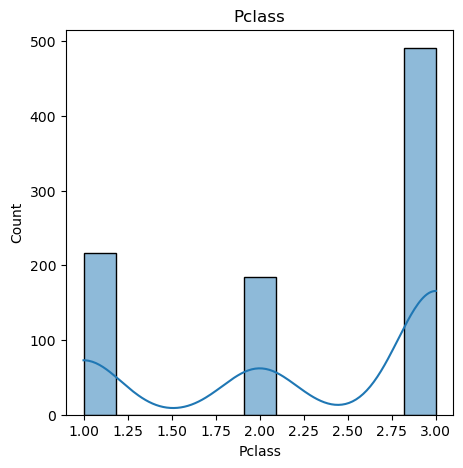

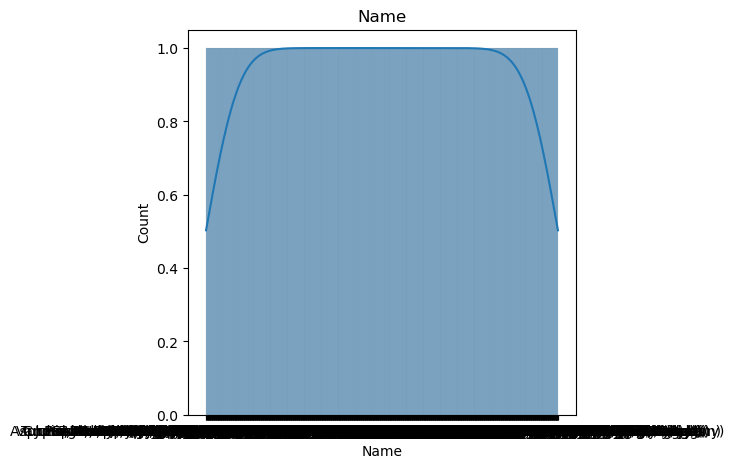

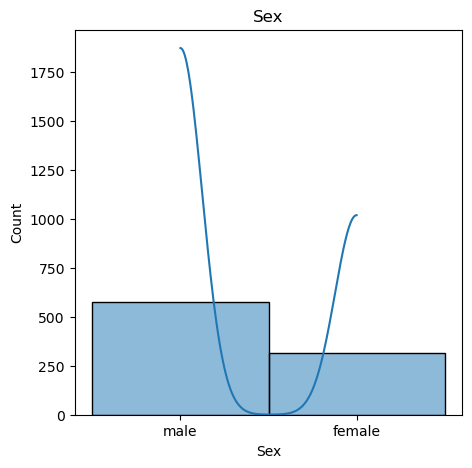

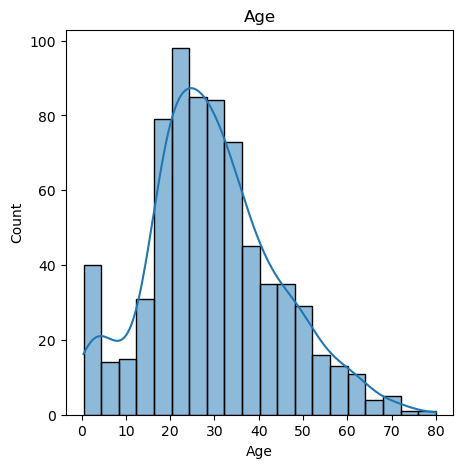

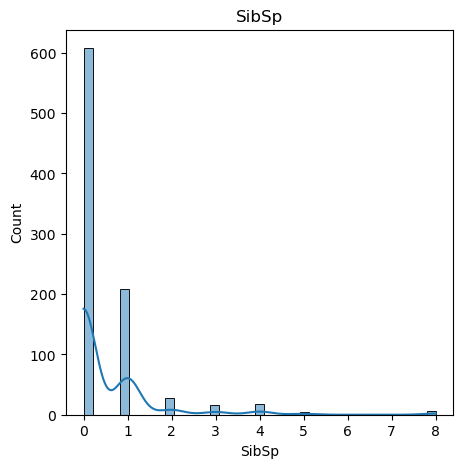

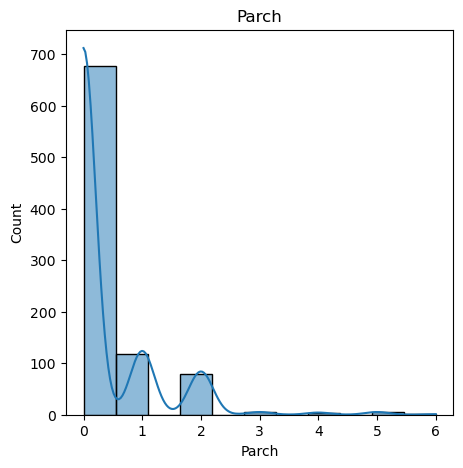

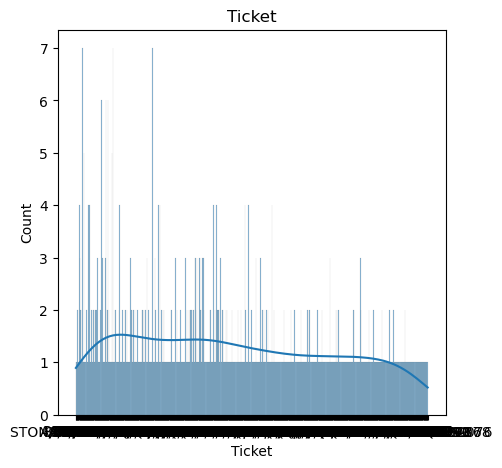

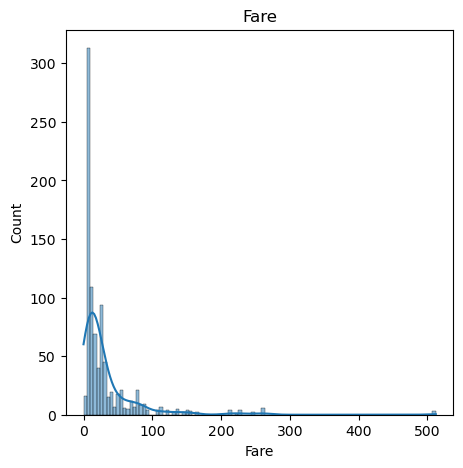

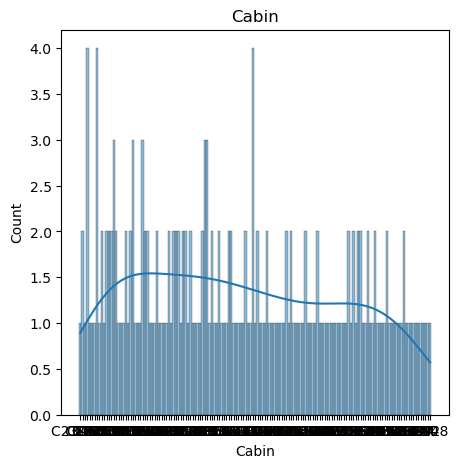

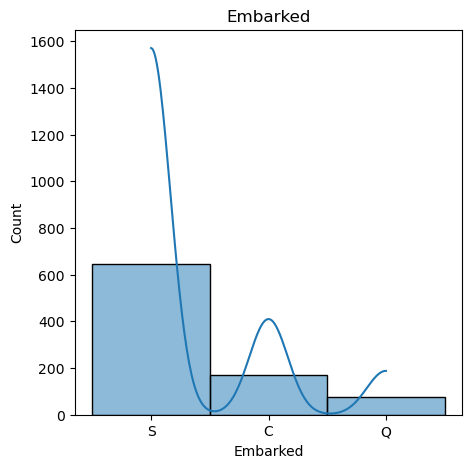

In [8]:
for column in df.columns:
    plt.figure(figsize=(5,5))
    sns.histplot(df[column],kde=True)
    plt.title(column)
    plt.show()

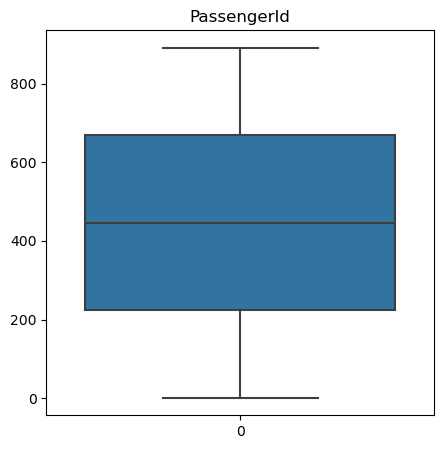

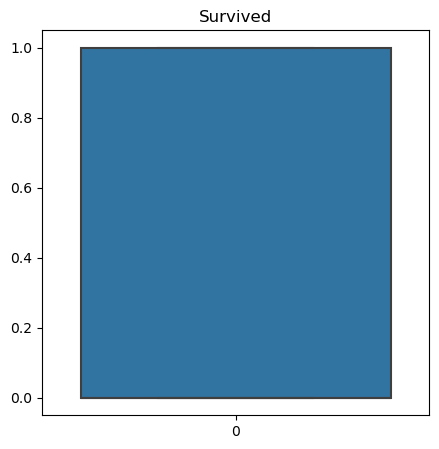

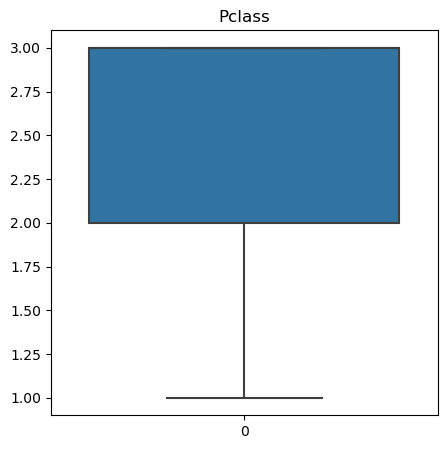

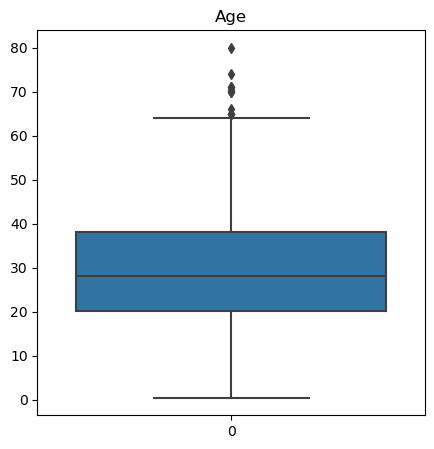

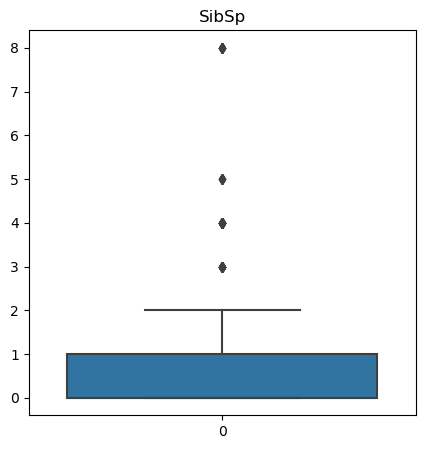

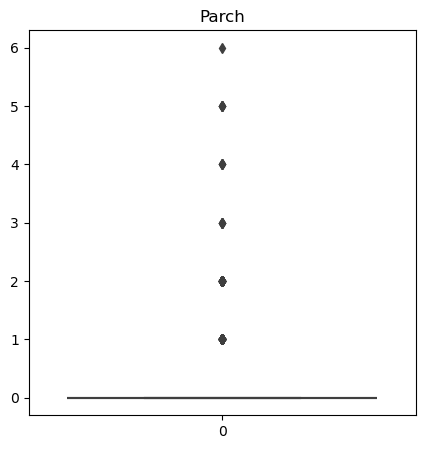

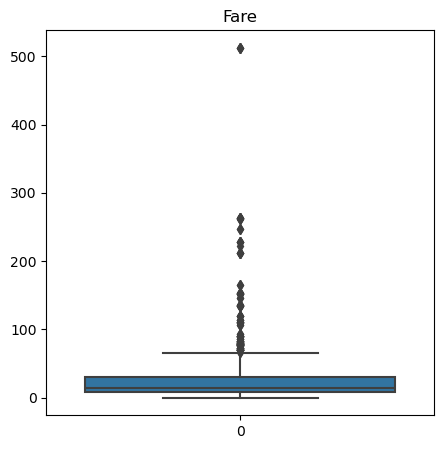

In [9]:
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(5,5))
    sns.boxplot(df[column])
    plt.title(column)
    plt.show()

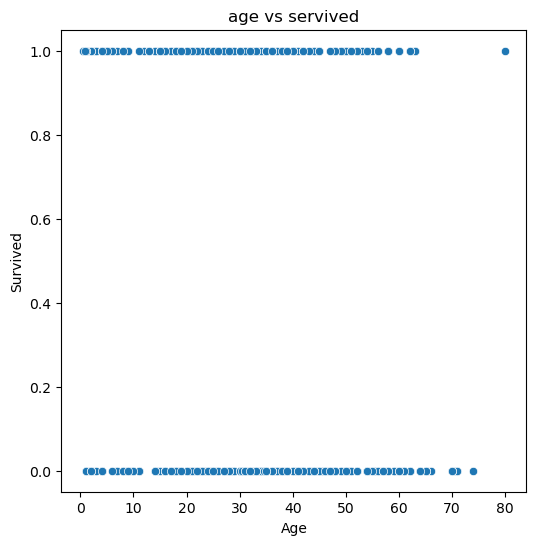

In [10]:
# Scatter plot of Age vs Survival
plt.figure(figsize=(6,6))
sns.scatterplot(data=df,x='Age',y='Survived')
plt.title('age vs servived')
plt.show()

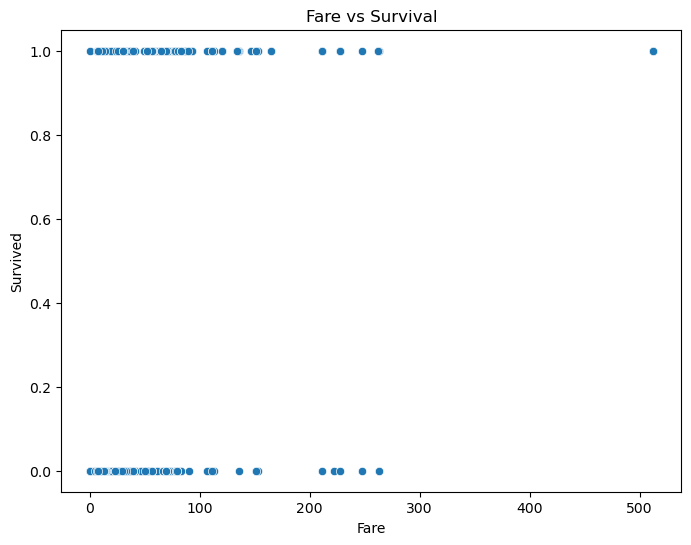

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Fare', y='Survived', data=df)
plt.title('Fare vs Survival')
plt.show()

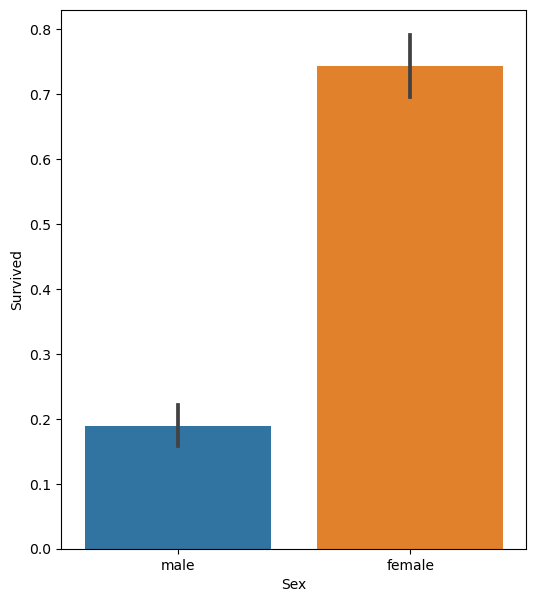

In [12]:
plt.figure(figsize=(6,7))
sns.barplot(data=df,x='Sex',y='Survived')
plt.show()

<Axes: xlabel='Pclass', ylabel='Survived'>

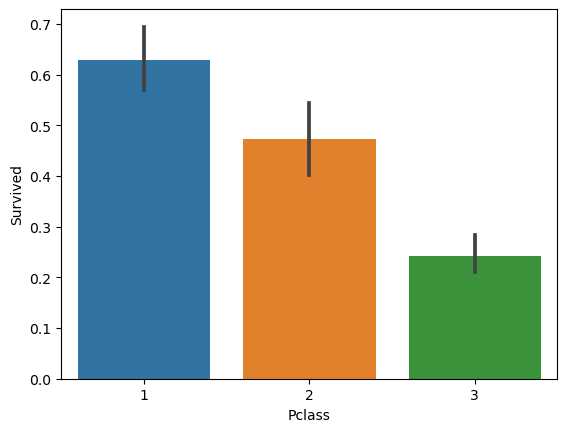

In [13]:
sns.barplot(data=df,x='Pclass',y='Survived')

In [14]:
df[df.duplicated(keep=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [15]:
imputer = SimpleImputer(strategy='most_frequent')
df[['Age', 'Cabin','Embarked']] = imputer.fit_transform(df[['Age', 'Cabin','Embarked']])



In [16]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [17]:
df=df.drop('Name',axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 76.7+ KB


In [19]:
label=LabelEncoder()
df['Sex']=label.fit_transform(df['Sex'])
df['Age']=label.fit_transform(df['Age'])
df['Embarked']=label.fit_transform(df['Embarked'])
df['Cabin']=label.fit_transform(df['Cabin'])
df['Ticket']=label.fit_transform(df['Ticket'])


In [20]:
x = df.drop('Survived', axis=1)
y=df['Survived']

In [21]:
x


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,1,28,1,0,523,7.2500,47,2
1,2,1,0,51,1,0,596,71.2833,81,0
2,3,3,0,34,0,0,669,7.9250,47,2
3,4,1,0,47,1,0,49,53.1000,55,2
4,5,3,1,47,0,0,472,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...
886,887,2,1,35,0,0,101,13.0000,47,2
887,888,1,0,24,0,0,14,30.0000,30,2
888,889,3,0,31,1,2,675,23.4500,47,2
889,890,1,1,34,0,0,8,30.0000,60,0


In [22]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=40,test_size=0.2)

In [24]:
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 266, number of negative: 446
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 720
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373596 -> initscore=-0.516823
[LightGBM] [Info] Start training from score -0.516823
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

LGBMClassifier()

In [25]:
y_pred_lgb=lgb_model.predict(x_train)

In [26]:
xgb_model=xgb.XGBClassifier()
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [27]:
y_pred_xgb=xgb_model.predict(x_train)

In [28]:
print(y_test.shape)
print(y_pred_lgb.shape)


(179,)
(712,)


In [29]:
y_pred_lgb = y_pred_lgb[:len(y_test)]         #it use to do same length


In [30]:
y_test = y_test[:len(y_pred_lgb)]


In [31]:
print(y_test.shape)
print(y_pred_lgb.shape)


(179,)
(179,)


In [32]:
# Evaluate metrics
print("LightGBM:")
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("Precision:", precision_score(y_test, y_pred_lgb))
print("Recall:", recall_score(y_test, y_pred_lgb))
print("F1-score:", f1_score(y_test, y_pred_lgb))


LightGBM:
Accuracy: 0.553072625698324
Precision: 0.4666666666666667
Recall: 0.3684210526315789
F1-score: 0.4117647058823529


In [33]:
print(y_test.shape)
print(y_pred_xgb.shape)


(179,)
(712,)


In [34]:
y_pred_xgb=y_pred_xgb[:len(y_test)]

In [35]:
y_test=y_test[:len(y_pred_xgb)]

In [37]:
print(y_pred_xgb.shape)
print(y_test.shape)

(179,)
(179,)


In [38]:
print("XGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1-score:", f1_score(y_test, y_pred_xgb))



XGBoost:
Accuracy: 0.553072625698324
Precision: 0.4666666666666667
Recall: 0.3684210526315789
F1-score: 0.4117647058823529
